<a href="https://colab.research.google.com/github/elichen/aoc2022/blob/main/Day_17_Pyroclastic_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
line = '>>><<><>><<<>><>>><<<>>><<<><<<>><>><<>>'
len(line)

40

In [ ]:
line = open("input.txt").read().strip()

In [ ]:
import numpy as np

In [ ]:
rocks = [
np.array([[1,1,1,1]]),
np.array([[0,1,0],
          [1,1,1],
          [0,1,0]]),
np.array([[0,0,1],
          [0,0,1],
          [1,1,1]]),
np.array([[1],
          [1],
          [1],
          [1]]),
np.array([[1,1],
          [1,1]])
]

In [ ]:
pit = np.ones([1,7])
for _ in range(4):
  pit = np.insert(pit, 0, 0, axis=0)
highest_rock = 4
rock = rocks[0]
rock_row, rock_col = 0,2
max_rocks = 2022
cur_rock = 0
wind_i = 0
while cur_rock < max_rocks:
  # debug print
  # copy = np.array(pit)
  # copy[rock_row:rock_row+rock.shape[0], rock_col:rock_col+rock.shape[1]] += rock*2
  # print(copy)
  # print(highest_rock)
  # wind push
  wind = line[wind_i]
  wind_i = (wind_i+1) % len(line)
  if wind == '>':
    wind_offset = 1
  else:
    wind_offset = -1
  if (rock_col+wind_offset >= 0 and
      rock_col+wind_offset+rock.shape[1] <= 7 and
      np.sum(rock * pit[rock_row:rock_row+rock.shape[0], rock_col+wind_offset:rock_col+wind_offset+rock.shape[1]]) == 0):
    rock_col += wind_offset
  # fall
  rock_row += 1
  if np.sum(rock * pit[rock_row:rock_row+rock.shape[0], rock_col:rock_col+rock.shape[1]]) > 0:
    rock_row -= 1
    pit[rock_row:rock_row+rock.shape[0], rock_col:rock_col+rock.shape[1]] += rock
    highest_rock = min(rock_row,highest_rock)
    cur_rock += 1
    rock = rocks[cur_rock%len(rocks)]
    while highest_rock <= 2 + rock.shape[0]:
      pit = np.insert(pit, 0, 0, axis=0)
      highest_rock += 1
    rock_row, rock_col = highest_rock-rock.shape[0]-3,2

In [ ]:
pit.shape[0]-highest_rock-1

3065

In [ ]:
len(line)

10091

In [ ]:
def run(max_rocks):
  global pit
  pit = np.ones([1,7])
  for _ in range(4):
    pit = np.insert(pit, 0, 0, axis=0)
  highest_rock = 4
  rock = rocks[0]
  rock_row, rock_col = 0,2
  cur_rock = 0
  wind_i = 0
  while cur_rock < max_rocks:
    wind = line[wind_i]
    wind_i = (wind_i+1) % len(line)
    if wind == '>':
      wind_offset = 1
    else:
      wind_offset = -1
    if (rock_col+wind_offset >= 0 and
        rock_col+wind_offset+rock.shape[1] <= 7 and
        np.sum(rock * pit[rock_row:rock_row+rock.shape[0], rock_col+wind_offset:rock_col+wind_offset+rock.shape[1]]) == 0):
      rock_col += wind_offset
    # fall
    rock_row += 1
    if np.sum(rock * pit[rock_row:rock_row+rock.shape[0], rock_col:rock_col+rock.shape[1]]) > 0:
      rock_row -= 1
      pit[rock_row:rock_row+rock.shape[0], rock_col:rock_col+rock.shape[1]] += rock
      highest_rock = min(rock_row,highest_rock)
      cur_rock += 1
      rock = rocks[cur_rock%len(rocks)]
      while highest_rock <= 2 + rock.shape[0]:
        pit = np.insert(pit, 0, 0, axis=0)
        highest_rock += 1
      rock_row, rock_col = highest_rock-rock.shape[0]-3,2
  return pit.shape[0]-highest_rock-1
run(2022)

3065

In [ ]:
x = [x*x*10 for x in range(10)]
y = [run(i) for i in x]

In [ ]:
x,y

([0, 10, 40, 90, 160, 250, 360, 490, 640, 810],
 [0, 14, 62, 135, 234, 364, 545, 733, 964, 1205])

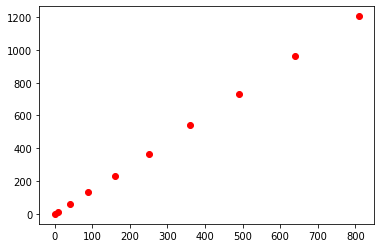

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'ro')
plt.show()

In [ ]:
def run_with_history(max_rocks):
  global pit
  pit = np.ones([1,7])
  for _ in range(4):
    pit = np.insert(pit, 0, 0, axis=0)
  highest_rock = 4
  heights = []
  prev_height = 0
  rock = rocks[0]
  rock_row, rock_col = 0,2
  cur_rock = 0
  wind_i = 0
  while cur_rock < max_rocks:
    wind = line[wind_i]
    wind_i = (wind_i+1) % len(line)
    if wind == '>':
      wind_offset = 1
    else:
      wind_offset = -1
    if (rock_col+wind_offset >= 0 and
        rock_col+wind_offset+rock.shape[1] <= 7 and
        np.sum(rock * pit[rock_row:rock_row+rock.shape[0], rock_col+wind_offset:rock_col+wind_offset+rock.shape[1]]) == 0):
      rock_col += wind_offset
    # fall
    rock_row += 1
    if np.sum(rock * pit[rock_row:rock_row+rock.shape[0], rock_col:rock_col+rock.shape[1]]) > 0:
      rock_row -= 1
      pit[rock_row:rock_row+rock.shape[0], rock_col:rock_col+rock.shape[1]] += rock
      highest_rock = min(rock_row,highest_rock)
      cur_rock += 1
      rock = rocks[cur_rock%len(rocks)]
      while highest_rock <= 2 + rock.shape[0]:
        pit = np.insert(pit, 0, 0, axis=0)
        highest_rock += 1
      rock_row, rock_col = highest_rock-rock.shape[0]-3,2
      heights.append(pit.shape[0]-highest_rock-1 - prev_height)
      prev_height = pit.shape[0]-highest_rock-1
  return heights
history = run_with_history(10000)

In [ ]:
chunk = 50
prefix, segment = 0,0
for i in range(len(history)//2):
  for j in range(i+1,len(history)//2):
    if history[i:i+chunk] == history[j:j+chunk]:
      if prefix == 0:
        prefix = i
      elif segment == 0:
        segment = j-prefix
        break
prefix, segment

(1110, 3470)

In [ ]:
tall_blocks = 1000000000000
num_segments = (tall_blocks - prefix) // segment
leftover = (tall_blocks - prefix) % segment
sum(history[:prefix])+num_segments*sum(history[prefix:prefix+segment])+sum(history[prefix:prefix+leftover])

1562536022966